# Notes

## Permuation matrices and graphs

- $P$ obtained by permuting rows of an identity matrix. $N!$ possile permutations possible of an identity matrix. $PA$ permutes the $i^{th}$ row of A to $\pi(i^{th})$ row of $PA$. $AP$ moves the $i^{th}$ column of $A$ to $\pi(i^{th})$ column of $AP$. 
- $PP^T = P^TP = I$ so $P^T = P^{-1}$
- $Me_j$ selects the $j^{th}$ column of $M$. $e^T_iM$ selects the $i^{th}$ row of $M$. $e^T_iMe_j$ selects the $i^{th}$ row of $j^{th}$ column, which is equal to $M_{ij}$
- let $A_1$ and $A_2$ be the adjacency matrices of two isomorphic graphs with permutation $\pi_A$. Edge $(i,j)$ in $A_1$ corresponds to $(\pi_A(i),\pi_A(j))$ in $A_2$, so 
$$(A_2)_{(\pi_A(i),\pi_A(j))} = e^T_iA_1e_j$$
$$(Pe_i)^TA_1(Pe_j) = e^T_{i}A_1e_{j}$$
- more generally, $A_2 = PA_1P^T$, which is equivalent to $A_2P=PA_1$

## Projection onto Bistochastic Matrices

In [1]:
from IPython.display import IFrame
IFrame("./projection_onto_bistochastic_matrices.pdf", width=800, height=500)

## Matrix Concentration Inequalities

In [2]:
IFrame("./wip/bounding_erdos_renyi/main.pdf", width=800, height=500)

## Visualizing Erdos Renyi Kronecker Products

In [3]:
import numpy as np 
import igraph as ig
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
def get_graph(n, m):
    num_edges = int(round(n*m))
    g = ig.Graph.Erdos_Renyi(n, m=num_edges)
    p = ig.RainbowPalette(num_edges)
    g.es['color'] = [p.get(idx) for idx in xrange(num_edges)]
    return g

def get_ones_graph(n):
    J = np.ones((n,n))
    return ig.Graph.Adjacency(J.tolist(), mode=ig.ADJ_UNDIRECTED)

def adj_mat(g):
    return np.matrix(g.get_adjacency().data)

def get_kronecker_graph(g1, g2, graph_first=True):
    # setup
    graph = g1 if graph_first else g2
    ones = g2 if graph_first else g1
    p = len(g2.vs)
    
    # map colors to idx
    eid_color_map = {}
    for e, col in zip(graph.es, graph.es['color']):
        eid_color_map[(e.source, e.target)] = eid_color_map[(e.target, e.source)] = col
        
    # kron
    ak = np.kron(adj_mat(g1), adj_mat(g2))
    gk = ig.Graph.Adjacency(ak.tolist(), mode=ig.ADJ_UNDIRECTED)
    
    # map kron edge to color
    for edge in gk.es:
        i, j = edge.source, edge.target
        if graph_first: gi, gj = (i)//p, (j)//p
        else: gi, gj =  i % p, j % p
        edge['color'] = eid_color_map[(gi, gj)]
    
    return gk
    
def plot_graph(graph, **kw2):
    kw = dict(bbox=(150,150), vertex_size=7, vertex_color='gray', edge_width=1)
    if 'color' in graph.es.attributes(): kw['edge_color'] =graph.es['color']
    kw.update(kw2)
    return ig.plot(graph, **kw)

In [136]:
G2 = get_graph(2,.5)
G3 = get_graph(3,1)
J2 = get_ones_graph(2)
J3 = get_ones_graph(3)
J = lambda p: get_ones_graph(p)

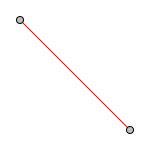

In [137]:
plot_graph(G2)

[[0 0 1 1]
 [0 0 1 1]
 [1 1 0 0]
 [1 1 0 0]]


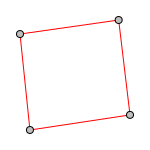

In [138]:
# G2 kron J2
gk = get_kronecker_graph(G2, J2)
print (adj_mat(gk))
plot_graph(gk)

[[0 0 0 1 1 1]
 [0 0 0 1 1 1]
 [0 0 0 1 1 1]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]]


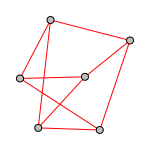

In [139]:
# G2 kron J3
gk = get_kronecker_graph(G2, J(3))
print (adj_mat(gk))
plot_graph(gk)

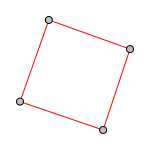

In [140]:
# J2 kron G2
plot_graph(get_kronecker_graph(J2, G2, graph_first=False))

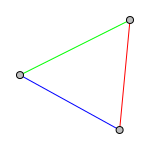

In [141]:
plot_graph(G3)

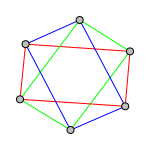

In [142]:
# G3 kron J2
G3J2 = get_kronecker_graph(G3, J(2))
plot_graph(G3J2)

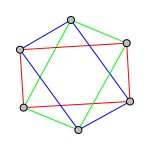

In [143]:
# J2 kron G3
J2G3 = get_kronecker_graph(J2, G3, graph_first=False)
plot_graph(J2G3)

### $G \otimes 1$

* Each 2-node subgraph $i \leftrightarrow j$ in the original graph is expanded to (or replaced by) an undirected $p$-regular graph with adjacency matrix $1_{p \times p}$. 
* Every node $i$ in the original graph is swapped by $p$ new nodes. In total, the kronecker graph will have $pn$ nodes.
* If a node belongs to multiple 2-node subgraphs (e.g. $i \leftrightarrow j$, $i \leftrightarrow k$), then the node will belong to the same number of $p$-regular graphs in the kronecker graph.
* Each edge to node $i$ increases the degree of nodes in the kronecker graph by $p$. Node with degree $d_i$ will be swapped by $p$ nodes with degree $pd_i$ each.
* Each regular subgraph consists of a $p$-sized subset of nodes and each node belongs to a subset of $p$-regular graphs.


### $1 \otimes G$
* The first term of the kronecker product, $1_{p \times p}$, is a clique with self-loops. The second term is the Erdos Renyi graph. 
* Every node in $J$ is replaced by $n$ new "ER" nodes.
* Each 2-node subgraph ($\frac{p^2}{2}$ in total) is replaced by the erdos renyi graph adjacency matrix. 
* Each node has degree $p$ (belongs to $p$ 2-node subgraphs), which implies that each node belongs to $p$ erdos renyi copies. 
* Each erdos-renyi copy consists of an $n$-sized subset of nodes and each node belongs to exactly $p$ erdos renyi copies.

### $A_{a \times a} \otimes B_{b \times b}$ 
* The kronecker product between $A$ and $B$ encodes _all_ pairwise products between elements in $A$ and $B$ --- $(ab)^2$ in total, arranged in a $ab \times ab$ sized square matrix. 